In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!rm -rf /content/Split_data

In [3]:
!unzip -q '/content/drive/MyDrive/Split_data.zip' -d /content/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [5]:
training_data_path =  '/content/Split_data/Train/Group_11'
validation_data_path = '/content/Split_data/Validation/Group_11'

In [6]:
os.listdir(training_data_path)

['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [7]:
os.listdir(validation_data_path)

['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [8]:
os.listdir(training_data_path+'/samosa')

['142.jpg',
 '216.jpg',
 '239.jpg',
 '096.jpg',
 '061.jpg',
 '192.jpg',
 '265.jpg',
 '007.jpg',
 '020.jpg',
 '162.jpg',
 '174.jpg',
 '262.jpg',
 '235.jpg',
 '134.jpg',
 '141.jpg',
 '125.jpg',
 '071.jpg',
 '116.jpg',
 '220.jpg',
 '132.jpg',
 '070.jpg',
 '210.jpg',
 '092.jpg',
 '048.jpg',
 '167.jpg',
 '111.jpg',
 '106.jpg',
 '084.jpg',
 '089.jpg',
 '077.jpg',
 '238.jpg',
 '056.jpg',
 '006.JPG',
 '264.jpg',
 '091.jpg',
 '104.jpg',
 '069.jpg',
 '115.jpg',
 '172.jpg',
 '012.jpg',
 'download (3).jpg',
 'images (15).jpg',
 '215.jpg',
 '126.jpg',
 'images (2).jpg',
 '085.jpg',
 '230.jpg',
 '153.jpg',
 '177.jpg',
 '027.jpg',
 '260.jpg',
 '023.jpg',
 '145.jpg',
 '103.jpg',
 'images (20).jpg',
 'images (7).jpg',
 '196.jpg',
 '074.jpg',
 '086.jpg',
 '164.jpg',
 '204.jpg',
 '095.jpg',
 '032.jpg',
 '225.jpg',
 'images (22).jpg',
 'download (4).jpg',
 '098.jpg',
 '261.jpg',
 '054.jpg',
 'images (5).jpg',
 '068.jpg',
 '194.jpg',
 '113.jpg',
 '043.jpg',
 '011.jpg',
 '076.jpg',
 '094.jpg',
 '258.jpg',
 

In [9]:
os.listdir(training_data_path+'/pav_bhaji')

['142.jpg',
 '254.jpg',
 '240.jpg',
 '323.jpg',
 '096.jpg',
 '333.jpg',
 '236.jpg',
 '007.jpg',
 '281.jpg',
 '087.jpg',
 '162.jpg',
 '343.jpg',
 '277.jpg',
 '174.jpg',
 '003.jpg',
 '303.jpg',
 '193.jpg',
 '208.jpg',
 'images (9).jpg',
 '250.jpg',
 '079.jpg',
 '346.jpg',
 'images.jpg',
 '235.jpg',
 'images (24).jpg',
 '134.jpg',
 '046.jpg',
 '071.jpg',
 '008.jpg',
 '178.jpg',
 'images (4).jpg',
 '088.jpg',
 '287.jpg',
 'download (7).jpg',
 '057.jpg',
 '053.jpg',
 'download (2).jpg',
 '210.jpg',
 '092.jpg',
 '062.jpg',
 'download (8).jpg',
 '034.jpg',
 '111.jpg',
 '184.jpg',
 '089.jpg',
 '077.jpg',
 '284.jpg',
 '278.jpg',
 '006.jpg',
 '296.jpg',
 '221.jpg',
 '056.jpg',
 '091.jpg',
 '124.jpg',
 '049.jpg',
 '067.jpg',
 '009.jpg',
 '233.jpg',
 '126.jpg',
 '324.jpg',
 '085.jpg',
 '149.jpg',
 '312.jpg',
 '280.jpg',
 '177.jpg',
 '137.jpg',
 '190.jpg',
 '027.jpg',
 '269.jpg',
 '304.jpg',
 '161.jpg',
 '112.jpg',
 'images (7).jpg',
 'images (12).jpg',
 '074.jpg',
 '185.jpg',
 '344.jpg',
 '341.jpg

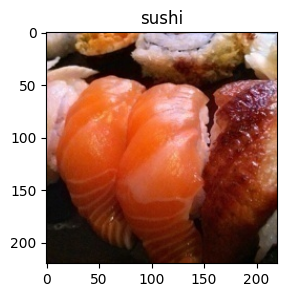

In [10]:
plt.figure(figsize=(5,3))
plt.title('sushi')
Baked_potato = plt.imread(training_data_path + '/sushi/1049178.jpg')
plt.imshow(Baked_potato)
plt.show()

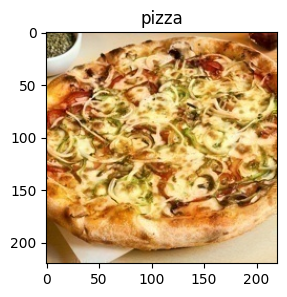

In [11]:
plt.figure(figsize=(5,3))
plt.title('pizza')
Donut = plt.imread(training_data_path + '/pizza/003.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [14]:
labels =  ['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [15]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 480 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [16]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import VGG16

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [19]:
num_classes = 4
vgg_model = VGG16(input_shape=(256, 256, 3),
                  weights='imagenet',
                  include_top=False)

# Freeze base model layers so only top layers train
for layer in vgg_model.layers:
    layer.trainable = False

# Flatten and add fully connected layers
x = Flatten()(vgg_model.output)
h1_out = Dense(units=128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(units=16, kernel_initializer='he_uniform', activation='relu')(h1_out)

# Final output layer for 3 classes
output = Dense(units=num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

# Create the final model
model = Model(inputs=vgg_model.input, outputs=output)


In [20]:
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [22]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3247 - loss: 1.3847 - val_accuracy: 0.6500 - val_loss: 0.9885
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 910ms/step - accuracy: 0.7291 - loss: 0.8797 - val_accuracy: 0.7812 - val_loss: 0.7214
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 705ms/step - accuracy: 0.7914 - loss: 0.6239 - val_accuracy: 0.7875 - val_loss: 0.5918
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 791ms/step - accuracy: 0.8762 - loss: 0.4835 - val_accuracy: 0.8313 - val_loss: 0.5140
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 799ms/step - accuracy: 0.9278 - loss: 0.3525 - val_accuracy: 0.8438 - val_loss: 0.4532
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.9492 - loss: 0.2737 - val_accuracy: 0.8250 - val_loss: 0.4676
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 633ms/step - accuracy: 0.9612 - loss: 0.2141 - val_accuracy: 0.8250 - val_loss: 0.4680
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 777ms/step - accuracy: 0.9738 - loss: 0.1980 - val_accurac

**test_model**

In [23]:
import cv2

In [24]:
labels

['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [25]:
train_input_data.class_indices

{'pav_bhaji': 0, 'samosa': 1, 'sushi': 2, 'pizza': 3}

In [26]:
def fun(path):
    global model, train_input_data

    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # Automatically adapts to whatever classes your train_input_data has
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()



Group class mapping: {'pav_bhaji': 0, 'samosa': 1, 'sushi': 2, 'pizza': 3}
Model output probabilities: [[0. 0. 0. 1.]]
Predicted class index: 3
Predicted label: pizza



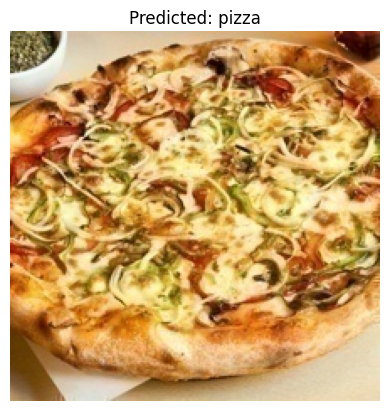

In [27]:
fun('/content/Split_data/Train/Group_11/pizza/003.jpg')


Group class mapping: {'pav_bhaji': 0, 'samosa': 1, 'sushi': 2, 'pizza': 3}
Model output probabilities: [[0.    0.999 0.001 0.   ]]
Predicted class index: 1
Predicted label: samosa



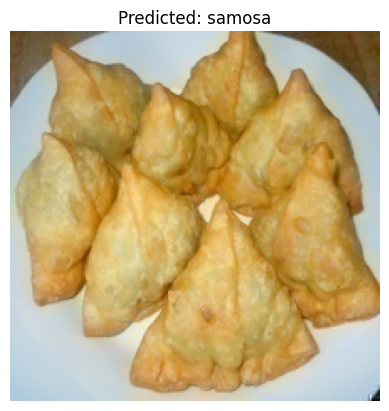

In [28]:
fun('/content/Split_data/Train/Group_11/samosa/002.jpg')

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [30]:
test_data_path = '/content/Split_data/Test/Group_11'

In [31]:
labels = ['pav_bhaji', 'samosa', 'sushi', 'pizza']

In [32]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 160 images belonging to 4 classes.


In [33]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [36]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [38]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

              precision    recall  f1-score   support

   pav_bhaji       0.84      0.95      0.89        40
      samosa       0.95      0.93      0.94        40
       sushi       0.95      0.90      0.92        40
       pizza       0.92      0.88      0.90        40

    accuracy                           0.91       160
   macro avg       0.92      0.91      0.91       160
weighted avg       0.92      0.91      0.91       160



In [39]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9125


In [40]:
from tensorflow.keras.models import load_model
model.save('/content/vgg16_group11.h5')
model = load_model('/content/vgg16_group11.h5')
